# Численное интегрирование

Физический смысл численного интегрирования состоит в нахождении первообразной функции на заданном интервале.

Например, зная, как меняется скорость некоторой величины на определенном интервале, можно определить значение этой величины на данном интевале.

На бытовом уровне, зная скорость автомобиля в течение некоторого времени, мы можем определить пройденное автомобилем расстояние, зная скорость заражения новым вирусом, мы можем определить число заболевших за указанный период, и так далее.

Большинство методов численного интегрирования построены на идее о том, что определенный интеграл некоторой величины равен площади фигуры, ограниченной снизу осью абсцисс (осью *x*), слева и справа - пределами интегрирования, а сверху - графиком функции.

Например, площадь синей фигуры на рисунке внизу соответствует формуле

$$
S = \int_{2}^{4} \sqrt x dx
$$

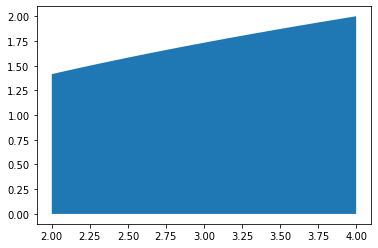

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(2, 4, endpoint=True)
ys = np.power(xs, 0.5)

fig = plt.figure()
plt.fill_between(xs, ys)
plt.show()

Большинство методов численного интегрирования основаны на замене интеграла суммой:

$$
\int_{x_l}^{x_r} f(x)dx \approx \sum_{i} c(x_i) \cdot f(x_i)
$$

где $c(x_i)$ - некоторый коэффициент (возможно, имеющий собственное в каждой точке $x_i$). 

Весь интервал, на котором производится интегрирование, разбивается на отдельные равные отрезки $(x_i, x_{i+1}), i=0..n, h=x_{i+1}-x_i$. Интеграл целиком будет равен сумме интегралов всех отрезков. 

Способы вычисления коэффициента $c$ определяют суть каждого метода численного интегрирования.

Ознакомиться с основами численного интегрирования можно в [соответствующей статье википедии](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B8%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5).

Кроме того, на [Хабре](https://habr.com/ru) имеется отличный [материал по численному интегрированию](https://habr.com/ru/post/420867/) с примерами реализации на языке *Python*.

Сами методы численного интегрирования иногда называют квадратурными формулами.

## Формула прямоугольников

Одним из простейших методов численного интегрирования является так называемая формула прямоугольников.

Суть метода заключается в вычислении значения функции $f$ в середине отрезка $(x_i, x_{i+1})$, $f(x_i+h/2)$.

Приближено считается, что площадь фигуры, ограниченной снизу осью абсцисс, сверху значением функции $f$ в точке $x=x_i+h/2$, $f(x_i+h/2)$, слева значением $x_i$, а справа - значением $x_{i+1}$, будет приближенно равна значению интеграла функции на этом отрезке,

$$
\int_{x_i}^{x_{i+1}}f(x) dx \approx h \cdot f(x_i+h/2)
$$

и значит, интеграл в целом

$$
\int_{a}^{b}f(x) dx \approx \sum_0^n h \cdot f(x_i + h/2)
$$

Для нахождения определенного интеграла при помощи формулы прямоугольников в экосистеме *Python* существует функция `scipy.integrate.quad(f, a, b)`, которой передаются три параметра, `f` - функция, которую необходимо проинтегрировать (задается в виде функции от одного аргумента, возвращающей единственое значение), `a` и `b` - соответственно, левый и правый пределы интегрирования. В обычных условиях функция возвращает два значения: собственно вычисленное значение интеграла, и ожидаемая абсолютная ошибка.

Рассмотрим интегрирование функции $f_0(x)=x$. Очевидно, это производная функции $f_1(x)=\frac {x^2} {2}$, так что мы сможем сравнить численное решение с аналитическим:

In [17]:
import scipy.integrate as intgt

a = 0
b = 2

def f0(x):
  return x

def f1(x):
  return x**2/2.0

real_integral = f1(b) - f1(a)
print("Аналитичесое значение: {}".format(real_integral))

calculated_integral, abs_error = intgt.quad(f0, a, b)
print("Численное значение: {}, ожидаемая ошибка: {}".format(calculated_integral, abs_error))

Аналитичесое значение: 2.0
Численное значение: 2.0, ожидаемая ошибка: 2.220446049250313e-14


Помимо нахождения интеграла функции, заданной в виде функции *Python*, имеются так же функции, использующие только значения функции (а не саму функцию) для нахождения интеграла.

Примером такой интегрирующей функции является функция `numpy.trapz`. Эта функция принимает до 4 аргументов, однако в реальности необходимы один или два аргумента. Самым простым примером будет следующий.

Для начала зададим точки $x_i$, и значения функции $f(x_i)$ в этих точках, которую хотим проинтегрировать:

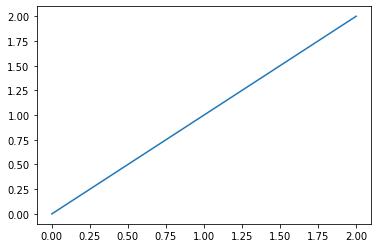

In [22]:
xs = np.linspace(a, b, num=50, endpoint=True) #  num задает количество точек на интервале, endpoint=True указывает, что конечная точка так же включается в интервал
ys = np.array([f0(x) for x in xs])

fig = plt.figure()
plt.plot(xs, ys)
plt.show()

Найдем аналитическое значение интеграла:

In [20]:
real_integral_value = f1(xs[-1]) - f1(xs[0]) #  вычисляем разность f(xn) - f(x0)
real_integral_value

2.0

И найдем значение интеграла численным методом с использованием метода трапеций

In [21]:
calculated_integral_value = np.trapz(ys, xs)
calculated_integral_value

2.0

Как можно видеть, значение интеграла, вычисленное аналитически, и значение интеграла, вычисленное методом трапеций, в данном случае совпадают.

Обратите внимание, функция `trapz` возвращает единственное значение, это вычисленное значение интеграла. Предполагаемая ошибка не вычисляется.

## Задание для самостоятельной работы

Для перечисленных ниже функций на интервале от 0 до 1 найдите аналитические значения интегралов, значения интегралов, вычисленные с использованием функции `quad`, и значения интегралов, вычисленных с помощью метода трапеций. Для метода трапеций выполните интегрирование с различным количеством промежуточных точек: 5, 10, 50. Объясните различия между полученными данными.

В формулах ниже подинтегральное выражение левой части - то, что необходимо проинтегрировать, правая часть - аналитическое решение, с которым необходимо сравнить полученный результат.

$$
\int x dx = \frac {x^2} {2}
$$

$$
\int \frac {1} {4 \cdot x^2 + 9} dx = 1/6 \cdot arctg (\frac {2} {3} \cdot x)
$$

$$
\int (2 \cdot x + 3)^2 dx = \frac {(2 \cdot x + 3)^3} {3}
$$

$$
\int sin(3 \cdot x) \cdot sin(2 \cdot x) dx = \frac {sin(x)} {2} - \frac {sin(5 \cdot x)} {10}
$$